# Machine Learning for AI - Classifying Glass Types

The goal of this project is to make predictions based on the classification of types of glasses based on their composition. The requirements for achieving this goal are the following according to the project's descriptor:

* Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss findings and what relevance they might have on the planned Neural Network model. 
* Perform any preparation of the data necessary, using python in the Jupyter notebook. Explain the rationale behind the data preparation and how it will assist the analysis. 
* Create and implement a Neural Network that will output a classification based on the Type of glass: (class attribute) feature. Test this model and try to improve it using different configurations of neurons/layers/loss functions/activation functions and discuss findings and final rational for the Neural network configuration. 
* Make a classification using test data, using the final Neural Network configuration and comment on the accuracy differential between the training and testing set. 

So, we get started by importing all the libraries and classes necessary for the completion of this analysis. 

In [133]:
# pip install imbalanced-learn

In [134]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import (StandardScaler, LabelEncoder)
from sklearn.model_selection import (train_test_split)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.utils import to_categorical

# The Data

This is a Glass Identification Database created by B. German from the Home Office Forensic Science Service in the UK and was motivated by crime investigations. A piece of glass at a crime scene can be identified by its composition and may be used as evidence, for example. 

## Data Dictionary

<p>The data used for this analysis is a Glass Identification Data Set. It contains 10 attributes including an ID ranging from 1 to 214. The Type of Glass is a categorical attribute containing seven different classes, represented by integers from 1 to 7. They are as follows.

<p>Id number: 1 to 214 <br>
RI: refractive index<br>
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)<br>
Mg: Magnesium<br>
Al: Aluminum<br>
Si: Silicon<br>
K: Potassium<br>
Ca: Calcium<br>
Ba: Barium<br>
Fe: Iron<br>
Type of Glass: (class attribute) <br>
    &nbsp;&nbsp;&nbsp;&nbsp; -- 1 building windows float processed  <br>
    &nbsp;&nbsp;&nbsp;&nbsp; -- 2 building windows nonfloat processed <br>
    &nbsp;&nbsp;&nbsp;&nbsp; -- 3 vehicle windows float processed <br>
    &nbsp;&nbsp;&nbsp;&nbsp; -- 4 vehicle windows nonfloat processed (none in this database) <br>
    &nbsp;&nbsp;&nbsp;&nbsp; -- 5 containers <br>
    &nbsp;&nbsp;&nbsp;&nbsp; -- 6 tableware <br>
    &nbsp;&nbsp;&nbsp;&nbsp; -- 7 headlamps<br>

The code below shows the data being loaded from the .csv file into a pandas dataframe, adding the names of the columns, which were not present in the original file. 

In [135]:
path = 'glass_data.csv'
columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass']
df = pd.read_csv(path, names=columns)
df = df.set_index('ID
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


# EDA and Cleaning

The .info() method applied to the df dataframe shows that the data is all numerical except for the target variable Type of Glass. It also shows that there are no null values in the data. 

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


The next step is to verify if the data contains duplicate record and remove in case there is any.

In [137]:
print(df.duplicated().sum()) 

1


In [138]:
df = df.drop_duplicates()
print(df.duplicated().sum()) 

0


From the below description, it is possible to say that all the Glass Types have average high levels of Silicon (Si). The range is the Si values is also much higher than the other columns and will need scaling before the data is fed to the model training. 

In [139]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


By plotting a boxplot of the distribution of each glass type for every column, we identify several outliers within the dataset. In statistics, an outlier is an observation point that is distant from other observations. Outliers can have a negative impact on the model's accuracy (ref). The need to be removed in order to make the data more coherent. The plot shows outliers for all the nine features. 

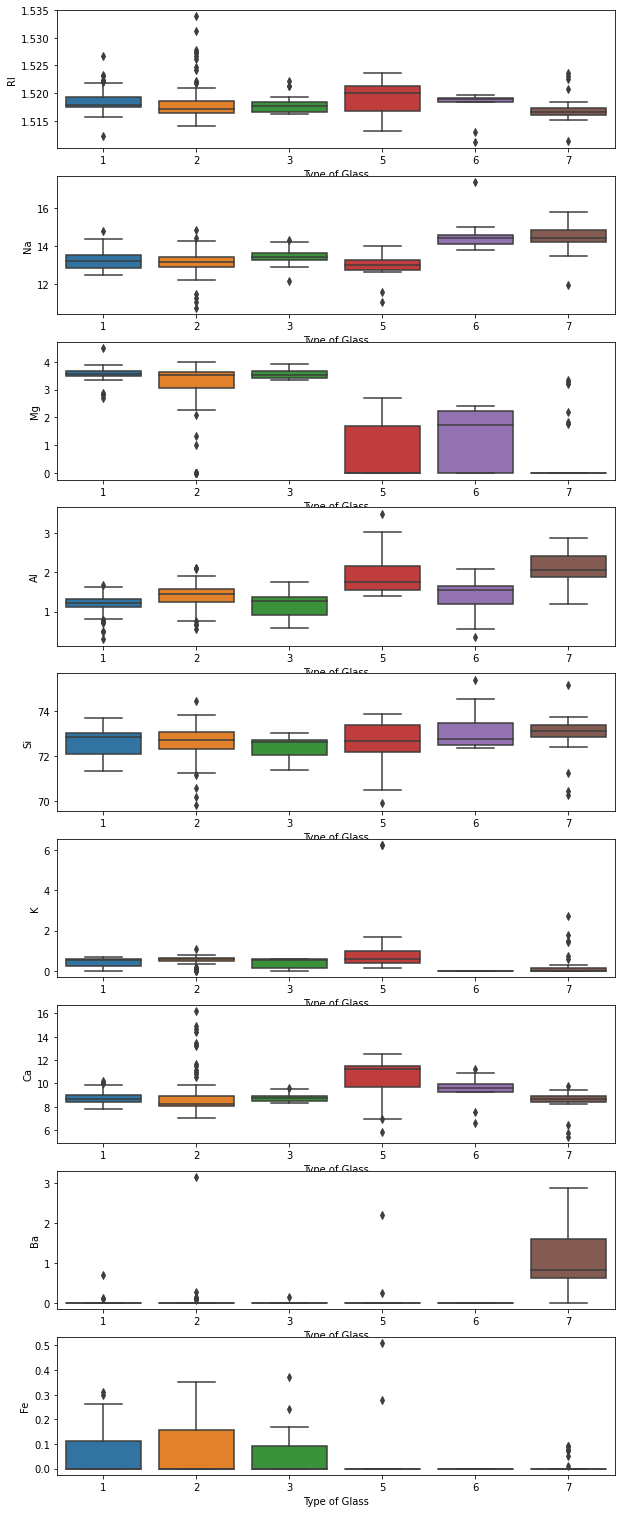

In [140]:
plot_X = df.iloc[:,:-1]
plot_y = df.iloc[:,-1]
plt.figure(figsize=(10,30))
for i,col in enumerate(plot_X,1):
    plt.subplot(10,1,i)
    sns.boxplot(y=col,x=plot_y, data=plot_X)
plt.show()

In the following two cells, we will use IQR to find the outliers in the dataframe so that we can delete them. The interquartile range IQR shows the range where most of the values lie. The interquartile range is calculated by subtracting the first quartile from the third quartile. <br>IQR = Q3 - Q1

In [141]:
columns = df.columns.tolist()

def outliers(df):   
    outlier = []   
    
    for col in columns:        
        Q1 = np.percentile(df[col], 25)       
        Q3 = np.percentile(df[col],75)        
        IQR = Q3 - Q1
              
        outlier_step = 1.5 * IQR        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier.extend(outlier_list_col)
        
    outlier = Counter(outlier)        
    multiple_outliers = list( k for k, v in outlier.items() if v > 2 )
    print(multiple_outliers) 
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outliers(df[columns]))))  


[104, 106, 107, 108, 111, 112, 185, 186, 190, 164, 172, 173, 192, 193, 196, 197, 198, 199, 200, 203, 209, 210, 202, 187, 208]
The dataset contains 25 observations with more than 2 outliers


The method above found a total of 25 records with more than two outliers. These observations will be next removed from the data as it can be seen in the cell below. 

In [142]:
outlier = outliers(df[columns])
df = df.drop(outlier).reset_index(drop=True)
print(df.shape)

[104, 106, 107, 108, 111, 112, 185, 186, 190, 164, 172, 173, 192, 193, 196, 197, 198, 199, 200, 203, 209, 210, 202, 187, 208]
(188, 10)


The same boxplot is drawn again to show the dataset now with the reduced number of outliers. For this specific case there are still some outliers left, but since the number of observations is small, we chose not to delete anymore of them. 

In [143]:
plot_X = df.iloc[:,:-1]
plot_y = df.iloc[:,-1]
plt.figure(figsize=(10,30))
for i,col in enumerate(plot_X,1):
    plt.subplot(10,1,i)
    sns.boxplot(y=col,x=plot_y, data=plot_X)
plt.show()

Now we will plot the distribution of the data among the types of glass. The dataset is not evenly distributed, having a much larger amount of glass from type 1 and 2, while having none from type 4. 

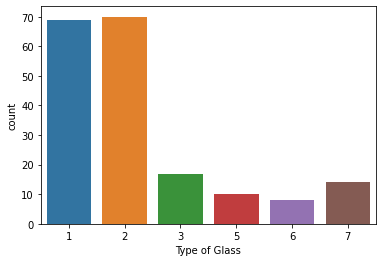

In [144]:
sns.countplot(df['Type of Glass'])
plt.show()

In [145]:
features = df.iloc[:,:-1]
plt.figure(figsize = (20,16))
n=0
for i in features:
    n+=1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
    plot = sns.barplot(x = "Type of Glass", y = i,ci = None, data = df)
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2.,p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    plt.title = ('Plot of {i}')
    plt.xlabel = ('Type of Glass')
    plt.ylabel = ('{i}')
plt.show()

The distribution of features in each of the types is also not even, being Barium (Ba) the most skewed, as seen in the visualizations above and below. 

In [146]:
cols = df.columns.tolist()
sns.pairplot(df[cols])

We also need to understand the importance of each element/feature on the "Type of Glass" value. For that we will slice the dataframe to select our feature and target variables to then apply the feature_importances_ class of the Extra Trees Classifier library from sklearn. The feature importance assigns a score to each feature of the data; the higher the score, the more important or meaningful the feature is to the output variable. In case any of the features' importance is negligible, it could be discarded, reducing the data's dimensionality. Although, it is not the case as the graph below shows. 

[0.142 0.097 0.168 0.141 0.095 0.105 0.127 0.065 0.06 ]


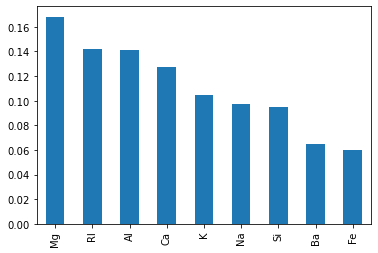

In [147]:
plot_X = df.iloc[:,:-1]
plot_y = df.iloc[:,-1]
model = ExtraTreesClassifier()
model.fit(plot_X,plot_y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=plot_X.columns)
feat_importances.nlargest(9).plot(kind='bar')
plt.show()

# Data Preparation

At this stage we will be addressing the issues that surfaced during the exploratory analysis. 

In [148]:
import imblearn
print(imblearn.__version__)

0.8.0


The first action to prepare the data to feed the model will be to deal with the distribution of the classes for the target variable. For that we will use Synthetic Minority Oversampling TEchnique, or SMOTE for short, from the imbalanced-learn library for Python. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line (Brownlee, 2020 b).

In [149]:
X = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = df[['Type of Glass']]

After separating the dataframe into features (X) and target (y), we need to encode the target labels in order to apply the oversample method to both X and y. Again, due to the reduced size of the dataset, we will be oversampling the full dataset instead of the recommended resampling og only the train variables, so that we have a little more data to work with. We are using the default mode of SMOTE, which creates new records for the minority classes based on the class with the most observations. This results in a fully balanced dataset with each of the classes containing 70 observations.  

In [150]:
y = LabelEncoder().fit_transform(y)
y = y.ravel()
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=70 (16.667%)
Class=1, n=70 (16.667%)
Class=2, n=70 (16.667%)
Class=3, n=70 (16.667%)
Class=4, n=70 (16.667%)
Class=5, n=70 (16.667%)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Although balanced, the data is yet measured on different scales as we mention previously in the data exploration. We can see in the graph below that the range for the Silicon values is much higher than the rest of the elements in the composition of glass. This can cause the model to misinterpret inputs.

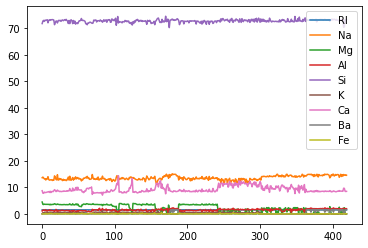

In [151]:
X.plot()

To fix that we will use StandardScaler() in our X variable so that it will transform the data and make it all be within the same range before we split the data.

In [152]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.225,  0.084,  1.562, ..., -0.436, -0.429, -0.511],
       [-0.377,  0.395,  0.969, ..., -1.208, -0.429, -0.511],
       [-1.051, -0.053,  0.936, ..., -1.25 , -0.429, -0.511],
       ...,
       [-0.748,  1.221, -1.417, ..., -0.628,  2.521,  0.274],
       [-0.667,  1.484, -1.427, ..., -0.687,  2.643,  0.106],
       [-0.708,  1.274, -1.427, ..., -0.638,  2.556,  0.019]])

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

After slicing the X and y into the training and testing data, with the test size being of 20 percent of the full data, and a random state of 1, there is only one last step before building the model. Using the method to_categorical(), the y variables which have integers that represent different categories, is converted into a numpy array with binary values and has columns equal to the number of categories in the data (GeeksforGeeks, 2020).

In [154]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Modeling

According to Ray (2018), for building a deep learning model, we need to define the layers (Input, Hidden, and Output). Here, we will go ahead with a sequential model, which means that layers we will define sequentially. The first is the input layer which is specified while creating the layer with the input dim argument and setting it to nine for the nine independent variables.<br><br>
Next, we define the number of hidden layers along with the number of neurons and activation functions. The right number can be achieved by going through multiple iterations. Higher the number, more complex is your model. For this model we will use four hidden layers with 400, 300, 200, and 100 neurons consecutively. They will have an activation function "relu".<br><br>
Finally, we define the output layer with six neurons, which is the size of the output matrix, this time, using s "softmax" activation function (Ray, 2018). See mode summary below.

In [155]:
model = Sequential()
model.add(InputLayer(9,))
model.add(Dense(units = 400,activation = 'relu'))
model.add(Dense(units = 300,activation = 'relu'))
model.add(Dense(units = 200,activation = 'relu'))
model.add(Dense(units = 100,activation = 'relu'))
model.add(Dense(units = 6,activation = 'softmax'))

In [156]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 400)               4000      
_________________________________________________________________
dense_25 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_26 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_28 (Dense)             (None, 6)                 606       
Total params: 205,206
Trainable params: 205,206
Non-trainable params: 0
_________________________________________________________________


Now we need to configure the model for training. This will set the optimizer to change the weights and biases, and the loss function and metric to evaluate the model’s performance. Here, we will use “adam” as the optimizer, “accuracy” as the loss metric. For multiclass classification, we use “binary-crossentropy” from keras as a loss function.

In [157]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

The final step is fitting the model on the training dataset. Here we pass both X and y variables along with the number of epochs (50), representing the training iterations, as well as the batch size for each epoch, here set to 10. Now, the model is ready for the training. 

In [158]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
34/34 [==============================] - 1s 4ms/step - loss: 1.3270 - accuracy: 0.5643
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 0.5151 - accuracy: 0.7948
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.8193
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 0.4283 - accuracy: 0.8439
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.8957
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9053
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 0.2344 - accuracy: 0.9141
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9242
Epoch 9/50
34/34 [==============================] - 0s 3ms/step - loss: 0.1673 - accuracy: 0.9240
Epoch 10/50
34/34 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.9395
Epoch 11/50
34/34 [

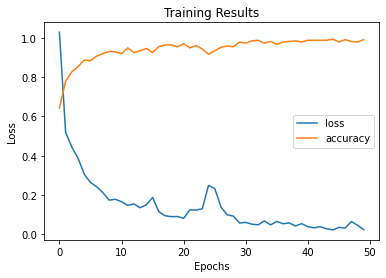

In [159]:
from matplotlib.pyplot import subplots, show
hist = pd.DataFrame(history.history)
fig = hist.plot()
fig.set(title="Training Results", 
        xlabel="Epochs",
        ylabel="Loss")
plt.show() 

# Evaluation

The next step is to evaluate the performance on the validation dataset for the model. For this specific model, the training accuracy got to over 99%, while the accuracy on the test dataset was of 89.29%. Chances are that number could have been influenced by the oversampling of the full dataset. The loss graph shows a peak between the 20th and the 30th epochs during training and further exploration should include Dropout layers in an attempt to avoid over training the data.  

In [160]:
_, accuracy = model.evaluate(X_test, y_test, verbose=2)

print('Accuracy: %.2f percent' % (accuracy*100))

3/3 - 0s - loss: 0.7913 - accuracy: 0.8929
Accuracy: 89.29 percent


In [161]:
# model.save_weights('mynn_final.h5')

In [162]:
# model.load_weights('mynn_final.h5')

# Prediction

After evaluating and finalizing the model parameters, we can go ahead with the prediction on the test data. Here we start a variable with the Sequential model to then apply the predict() function to the testing dataset. 

In [163]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [164]:
predictions = probability_model.predict(X_test) 

When printing the first ten records predicted by the model, we see an output composed of an array with the encoded values for each label. 

In [165]:
predictions[:10]

array([[0.13 , 0.13 , 0.13 , 0.13 , 0.13 , 0.352],
       [0.13 , 0.13 , 0.13 , 0.352, 0.13 , 0.13 ],
       [0.352, 0.13 , 0.13 , 0.13 , 0.13 , 0.13 ],
       [0.13 , 0.13 , 0.13 , 0.13 , 0.13 , 0.352],
       [0.352, 0.13 , 0.13 , 0.13 , 0.13 , 0.13 ],
       [0.13 , 0.13 , 0.13 , 0.352, 0.13 , 0.13 ],
       [0.142, 0.132, 0.332, 0.132, 0.132, 0.132],
       [0.13 , 0.13 , 0.13 , 0.13 , 0.352, 0.13 ],
       [0.13 , 0.13 , 0.13 , 0.13 , 0.352, 0.13 ],
       [0.337, 0.133, 0.137, 0.131, 0.131, 0.131]], dtype=float32)

To see the actual label, we need to apply the argmax function to the results. Here the results are within a range from 0 to 5, with only the present labels, which excludes the original type 4. The new data dictionary for the target variable in this case will be:<br>
0: 1 building windows float processed<br>
1: 2 building windows non float processed<br>
2: 3 vehicle windows float processed <br>
3: 5 containers<br>
4: 6 tableware<br>
5: 7 headlamps

In [166]:
print(np.argmax(predictions, axis=1))

[5 3 0 5 0 3 2 4 4 0 5 3 3 5 0 2 2 4 0 2 4 5 2 0 3 3 5 5 5 2 5 3 5 3 4 3 0
 4 3 3 4 1 5 5 0 4 4 1 4 3 0 3 2 2 2 5 2 3 3 5 0 4 1 3 5 1 3 2 1 2 2 2 0 4
 5 1 1 3 5 5 3 2 4 0]


In [167]:
y_test[:10]

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In the two cells above, we can see that the first items predicted in of type 5 (previous 7) and that can be validated against the y_test first line representing the fifth type. In the cell below, we are printing a comparison of the predicted x expected results from the classification.  

In [168]:
for i in range(10):
    print('%s => %d (expected %d)' % (X_train[i].tolist(), np.argmax(predictions[i]), np.argmax(y_test[i])))

[0.21733124750094954, 1.7366352278070465, -0.8860989805797219, 0.6346398165954632, -0.49229183737059984, -1.193254899765222, 0.5586355710511406, -0.4291930013504737, -0.5112014452171341] => 5 (expected 5)
[0.9638159238199394, -0.7968620448454765, -0.5636090778802221, 1.596404459772901, -0.774497982041095, 1.3589183241406269, 0.6253357632363463, -0.0643158929690957, 4.135170075817903] => 3 (expected 3)
[-1.0410409421391094, -0.40342602053069504, 0.8984379336724251, -0.5145379811159371, -0.026079216923041416, 0.7969975480741954, -0.7291223494053973, -0.4291930013504737, -0.5112014452171341] => 0 (expected 0)
[0.8433645413529092, 0.506637893554819, -0.5283180593415766, 0.3392458494902297, -1.8154356331895145, 0.22135754471662572, 1.0826357935939876, -0.4291930013504737, 1.524466486583793] => 5 (expected 5)
[1.02535005273825, 0.9795094847450817, -1.4269985080068395, 1.4010594475755729, 1.1422574262224268, -1.193254899765222, -0.6955660166164725, 2.663834932028955, -0.5112014452171341] => 0

# Conclusion

The achieved results are satisfactory. After the analysis, the preparation of the data, and a few tests with various configurations as well as changing the order of the data transformations, the final model is capable of classifying most of the records correctly. 

# References

Brownlee, J., 2018. _How to Remove Outliers for Machine Learning_. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/> [Accessed 23 May 2021].

Brownlee, J., 2020 a. _Multi-Class Imbalanced Classification_. [online] Machine Learning Mastery. Available at: 
<https://machinelearningmastery.com/multi-class-imbalanced-classification/> [Accessed 22 May 2021].

Brownlee, J., 2020 b. _SMOTE for Imbalanced Classification with Python_. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/> [Accessed 24 May 2021].

GeeksforGeeks. 2020. _Python Keras | keras.utils.to_categorical() - GeeksforGeeks_. [online] Available at: <https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/> [Accessed 23 May 2021].

Kaggle.com. 2020. _GlassClassification PCA and ANN_. [online] Available at: <https://www.kaggle.com/saaisudarsanand/glassclassification-pca-and-ann> [Accessed 24 May 2021].

Lakshmanamoorthy, R., 2021. _Deep Learning Using TensorFlow Keras - Analytics India Magazine_. [online] Analytics India Magazine. Available at: <https://analyticsindiamag.com/deep-learning-using-tensorflow-keras/> [Accessed 26 May 2021].

Ray, S., 2018. _Building your First Neural Network on a Structured Dataset (using Keras)_. [online] Medium. Available at: <https://medium.com/analytics-vidhya/build-your-first-neural-network-model-on-a-structured-dataset-using-keras-d9e7de5c6724> [Accessed 22 May 2021].

Scikit-learn.org. 2020. 6.3. _Preprocessing data — scikit-learn 0.24.2 documentation_. [online] Available at: <https://scikit-learn.org/stable/modules/preprocessing.html> [Accessed 25 May 2021].